# CNN
- 卷積運算後的效果很像濾鏡效果
- Max-pooling : 影像縮減取樣,
    - 減少需處理的資料點 ： 減少後續運算所需的時間
    - 讓影像位置差異變小 
    - 參數的數量和計算量下降 : 控制了overfitting

||reshape|說明|
|---|---|---|
|MLP|image.reshape(60000,784)|多元感知器因直接送進神經元處理，所以reshape轉換為60000筆，每一筆有784個數字，作為784個神經元的輸入
|CNN|image.reshape(60000,28,28,1)|CNN因為必須先進行卷積與池化運算，所以必須保持影像的維度，所以reshape轉換為60000筆，每一筆有28X28X1的影像

In [24]:
from keras.utils import np_utils # 因為後續要將label 標籤轉成one-hot encoding
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)

# 匯入Keras 模組
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_Train4D = X_train.reshape(X_train.shape[0],28,28,1).astype('float32')
X_Test4D = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')
print('X_Train:',X_Train4D.shape)
print('X_Test:',X_Test4D.shape)

X_Train: (60000, 28, 28, 1)
X_Test: (10000, 28, 28, 1)


In [4]:
# 數字標準化
X_Train4D_normalize = X_Train4D / 255
X_Test4D_normalize = X_Test4D / 255
# X_Train_normalize[0]

In [20]:
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()

2022-01-30 12:33:52.506874: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.add(Conv2D(filters = 16, kernel_size = (5,5), padding='same', input_shape= (28,28,1),activation='relu'))

- 會產生16個影像
- 每一個濾鏡是5x5
- 25 X 16 + 16 = 416

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

- 28X28 -> 14X14

In [10]:
model.add(Conv2D(filters= 36, kernel_size = (5,5), padding='same', activation='relu'))

- 16 X 25 X 36 + 36 = 14436

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

- 14 X 14 -> 7 X 7

In [12]:
model.add(Dropout(0.25)) # 放棄25％的神經元

In [13]:
model.add(Flatten()) # 7X7X36 = 1764

In [14]:
model.add(Dense(128,activation='relu')) # 1764 X 128 + 128 = 225920

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10,activation= 'softmax')) # 128 X 10 + 10 = 1290

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 36)          0         
                                                                 
 flatten (Flatten)           (None, 1764)              0

In [18]:
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [21]:
train_history = model.fit(x= X_Train4D_normalize, y = y_TrainOneHot, validation_split = 0.2, epochs=10, batch_size=300, verbose=2)

Epoch 1/10
160/160 - 12s - loss: 0.4827 - accuracy: 0.8490 - val_loss: 0.1002 - val_accuracy: 0.9701 - 12s/epoch - 78ms/step
Epoch 2/10
160/160 - 12s - loss: 0.1372 - accuracy: 0.9593 - val_loss: 0.0649 - val_accuracy: 0.9796 - 12s/epoch - 75ms/step
Epoch 3/10
160/160 - 12s - loss: 0.0965 - accuracy: 0.9713 - val_loss: 0.0512 - val_accuracy: 0.9847 - 12s/epoch - 76ms/step
Epoch 4/10
160/160 - 13s - loss: 0.0777 - accuracy: 0.9769 - val_loss: 0.0488 - val_accuracy: 0.9862 - 13s/epoch - 79ms/step
Epoch 5/10
160/160 - 13s - loss: 0.0667 - accuracy: 0.9796 - val_loss: 0.0380 - val_accuracy: 0.9897 - 13s/epoch - 82ms/step
Epoch 6/10
160/160 - 13s - loss: 0.0588 - accuracy: 0.9821 - val_loss: 0.0376 - val_accuracy: 0.9885 - 13s/epoch - 82ms/step
Epoch 7/10
160/160 - 13s - loss: 0.0527 - accuracy: 0.9843 - val_loss: 0.0349 - val_accuracy: 0.9900 - 13s/epoch - 79ms/step
Epoch 8/10
160/160 - 13s - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0311 - val_accuracy: 0.9907 - 13s/epoch - 82ms/step


In [25]:
# 建立 show_train_history 顯示訓練過程
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc="upper left")
    plt.show()

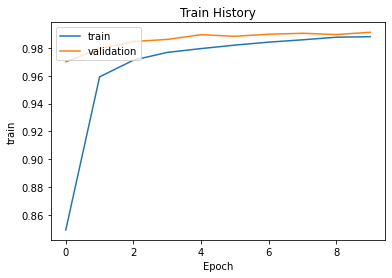

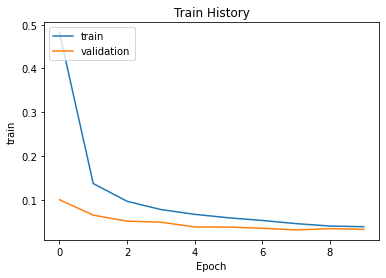

In [26]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [27]:
scores = model.evaluate(X_Test4D_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0252 - accuracy: 0.9915

accuracy= 0.9915000200271606


In [28]:
# prediction = model.predict_classes(X_Test)
predict_x=model.predict(X_Test4D_normalize) 
prediction=np.argmax(predict_x,axis=1)

In [29]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [32]:
#查看多筆訓練資料
def plot_images_labels_prediction(image, labels, prediction, idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0,num):
        ax = plt.subplot(5,5, i+1) #建立subgraph子圖形為5行5列
        ax.imshow(image[idx], cmap='binary') #畫出 subgraph 子圖形
        title = 'label=' + str(labels[idx]) # 設定子圖形title,顯示標籤欄位
        if len(prediction) > 0:
            title += ",predict="+str(prediction[idx]) # 標籤title加入預測結果
        ax.set_title(title,fontsize = 10) # 設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx += 1
    plt.show()

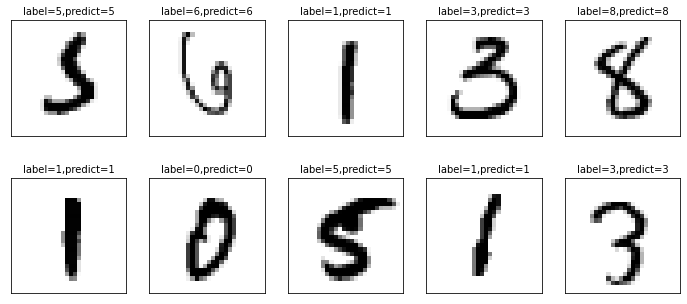

In [36]:
plot_images_labels_prediction(X_Test4D,y_test,prediction,idx=340)

In [38]:
import pandas as pd
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1127,3,3,0,0,1,0,1,0
2,0,0,1030,0,0,0,0,1,1,0
3,0,0,1,1007,0,1,0,0,1,0
4,0,0,0,0,976,0,0,1,2,3
5,1,0,0,8,0,879,1,0,1,2
6,7,2,0,0,1,4,942,0,2,0
7,0,1,4,3,0,0,0,1015,1,4
8,1,0,2,2,0,1,0,0,966,2


- '1' 最不容易混淆
- ‘5’ 最易混淆
- '6' 最容易混淆為0

In [40]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [41]:
df[(df.label==6)&(df.predict==0)]

,label,predict
259,6,0
445,6,0
965,6,0
3030,6,0
3422,6,0
3853,6,0
9888,6,0


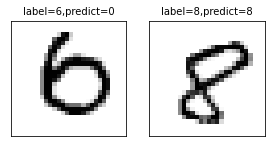

In [43]:
plot_images_labels_prediction(X_test,y_test,prediction,idx=259,num=2)

- Accuracy 約 0.99